![Portada](images/portada.jpg)

# Cómo se festivalea en Barcelona
 ### Análisis de datos sobre los festivales artísticos más populares entre 2013 - 2022 en la Ciudad Condal

## Índice:<br>

1. Introducción<br>
2. Aclaraciones iniciales
3. Importación de bibliotecas y funciones
4. Importación y limpieza de datos
5. Hipótesis: <br>
* El sector público programa festivales de ámbitos desatendidos por los programadores privados <br>
* La mayoría de los festivales se concentra justo antes y después de los meses de calor y playa <br>
* Los festivales gratuitos son los que convocan mayor número de asistentes <br>
* En Barcelona ha crecido la tendencia a programar macrofestivales <br>

#### Introducción:

En este EDA he buscado hacer una aproximación al estudio de la oferta d fetsivales artísticos en Barcelona, atendiendo a sus ámbitos artísticos, cantidad de asistentes, la época del año en que tienen lugar, así como si son organizados por organismos públicos o empresas privados, si cobran o no entrada, entre otras cosas.<br><br>
Mediante el análisis de datos he buscado entender qué diferencias hay entre los festivales programados por la administración pública frente a los gestionados por iniciativas privadas, así como entender la distribución de los eventos a lo largo del año, y ver posibles relaciones entre esta distribución y los ámbitos artísticos.<br><br>
Otra inquietud ha sido indagar si los fetsivales con entrada de pago presentan una barrera de acceso que influya en el número de asistentes, o si es en ciertos sectores culturales donde hay mayor hábito de pagar por las entradas, frente a otros sectores con mayor tendencia a los eventos gratuitos.<br><br>
Finalmente, he querido entender cómo ha sido la evolución de los festivales a lo largo de una década, con el ojo puesto en las tendencias, tanto de ámbito artístico como de la envergadura de los propios festivales. En esta evolución también me ha parecido interesante atender a los posibles cambios que se desataron por la pandemia, y en qué medida éstos se han mantendo o han vuelto a su cauce inicial pasados un par de años.<br><br>

##### Fuentes de datos

Los datos que he usado para el presente EDA son de carácter público, y están disponibles en una serie de webs de las administraciones públicas, tanto del [Ajuntamiento de Barcelona](https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals), de donde los he tomado, como de las administraciones que la engloban a nivel autonómico y nacional.

#### Aclaraciones iniciales

Creo importante destacar el recorte conceptual a la hora de incluir, o no, determinados eventos incluidos en los datos recogidos.<br>
En primer lugar, he dejado fuera aquellas entradas que estaban clasificadas como ferias. <br>
Y en segundo, dentro delas clasificadas como festivales, he hecho también un recorte a favor de aquellos eventos considerdos festivales en el sentido más próximo a fiesta, y descartando, en cambio, aquellos que por el contrario se acercan más a conferencias o mesas redondas. En consecuencia, una buena parte de los eventos catalogados en la base de datos como fetsivales de Letras han quedado fuera.<br>
También he decidido quitar aquellos eventos que por el formato eran solo ciclos, muestras o encuentros de pequeño formato.<br><br>
En una segunda instancia, he realizado un filtro tomando de cada uno de los 10 años de muestra aquellos 50 festivales con mayor número de asistentes y que tuvieran al menos 3 edicionesdentro del período analizado, para evitar incluir casos aislados que pudieran distorcionar la muestra y las conclusiones.

#### Importación de bibliotecas

Para llevar adelante este EDA he recurrido a las siguientes bibliotecas:

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Algunas funciones a utilizar son:

In [316]:
def plot_grouped_boxplots(df, cat_col, num_col, whisker_length=3):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)
    group_size = 12

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=subset_df, whis=whisker_length)
        plt.title(f'Boxplots of {num_col} for {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

In [317]:
def plot_media_asist_boxplots(df):
    media_asistentes = df.groupby(['NomDelFestival', 'Any'])['Asistentes'].mean().reset_index()
    media_asistentes_decada = media_asistentes.groupby('NomDelFestival')['Asistentes'].mean().reset_index()
    final_df = media_asistentes_decada.merge(df[['NomDelFestival', 'Entrada']].drop_duplicates(), on='NomDelFestival')
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Entrada', y='Asistentes', data=final_df)
    plt.title('Distribución de la Media de Asistentes por Tipo de Entrada')
    plt.xlabel('Tipo de Entrada')
    plt.ylabel('Media de Asistentes')
    plt.xticks(rotation=45)
    plt.show()


#### Importación de datos
Y estas son las tablas que he usado como punto de partida para mi EDA:

In [318]:
fests_22 = pd.read_csv("./data/2022_festivals-assistents-order-name.csv")
fuente_1 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/c573360d-ed5d-4609-aaa5-55bb9e9175ca#additional-info"
fests_21 = pd.read_csv("./data/2021_festivals-assistents-order-name.csv")
fuente_2 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/57ed9976-8291-418d-a0fc-ecf572d8cb74?inner_span=True"
fests_20= pd.read_csv("./data/2020_festivals-assistents-order-name.csv")
fuente_3 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/1214655c-38e5-4434-a35c-ed3a6468cd23?inner_span=True"
fests_19 = pd.read_csv("./data/2019_festivals-assistents-order-name.csv")
fuente_4 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/077d738b-997f-46b9-ab96-500ab22f32b6?inner_span=True"
fests_18 = pd.read_csv("./data/2018_festivals-assistents-order-name.csv")
fuente_5 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/a5522295-70f1-4d0b-8cb2-8762cbcbf783?inner_span=True"
fests_17 = pd.read_csv("./data/2017_festivals-assistents.csv")
fuente_6 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/7760d11f-a95f-4d6c-8230-e409b8ce6995?inner_span=True"
fests_16 = pd.read_csv("./data/2016_festivals-assistents.csv")
fuente_7 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/d151b7bc-2cb4-48c9-89e3-1c733a7cf511?inner_span=True"
fests_15 = pd.read_csv("./data/2015_festivals-assistents.csv")
fuente_8 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/5797a47d-45c9-40c3-aacb-2d3fcd5c6cf7?inner_span=True"
fests_14 = pd.read_csv("./data/2014_festivals-assistents.csv")
fuente_9 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/f2afdc37-2d91-48e5-9319-4d94d57d8c63?inner_span=True"
fests_13 = pd.read_csv("./data/2013_festivals-assistents.csv")
fuente_10 = "https://opendata-ajuntament.barcelona.cat/data/es/dataset/dades-festivals/resource/ae5be150-db8f-4d66-8605-78bf2f02d375?inner_span=True"

#### Limpieza de datos

Luego, he procesado cada una de esas tablas con una serie de funciones para añadir, transformar y eliminar filas, columnas y valores, como se puede observar en el correspondiente notebook 1_preparacion_datos <BR> <BR>AÑADIR ENLACE!!!!<BR><BR>
Una vez realizado este primer paso de limpieza general, he pasado al análisis individual e inicial de cada dataframe, cada uno correspondiente a uno de los años de la década analizada, y sobre ellos he realizado prácticamente las mismas opraciones, que luego me permitieran compararlos y encontrar similitudes y diferencias. <r>
De este modo, resulta una colección de 10 notebooks, uno por año para analizar la situación de los festivales en Barcelona en los años 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021 y 2022. <BR> <BR>AÑADIR ENLACE!!!!<BR><BR> La organización del análisis univariable de cada dataframe / año en un notebook diferente ha hecho más sencillo su análisis, comprensión y posterior comparación, y gracias a esta primera exploración general he podido tener una impresión de qué datos pueden ser relevantes o no para trabajar mis hipótesis, qué detalles resultaban a primera vista sorprendentes o significativos, de qué hilos tirar más adelante, etc.<br>

In [319]:
festivales_bcn_18 = pd.read_pickle("./data/festivales_bcn_18_procesado.pkl")
festivales_bcn_19 = pd.read_pickle("./data/festivales_bcn_19_procesado.pkl")
festivales_bcn_20 = pd.read_pickle("./data/festivales_bcn_20_procesado.pkl")
festivales_bcn_21 = pd.read_pickle("./data/festivales_bcn_21_procesado.pkl")
festivales_bcn_22 = pd.read_pickle("./data/festivales_bcn_22_procesado.pkl")
festivales_bcn_17 = pd.read_pickle("./data/festivales_bcn_17_procesado.pkl")
festivales_bcn_16 = pd.read_pickle("./data/festivales_bcn_16_procesado.pkl")
festivales_bcn_15 = pd.read_pickle("./data/festivales_bcn_15_procesado.pkl")
festivales_bcn_14 = pd.read_pickle("./data/festivales_bcn_14_procesado.pkl")
festivales_bcn_13 = pd.read_pickle("./data/festivales_bcn_13_procesado.pkl")

Los dataframes resultantes contienen los siguientes elementos:

In [320]:
festivales_bcn_22.head()

,Any,Ambit,Edicio,NomDelFestival,Titularidad,Mes,Estacion,Asistentes,Entrada
1,2022,Audiovisuals,8.0,Americana Film Fest,Privada,Marzo,Invierno,8968.0,De Pago
2,2022,Arts visuals,9.0,Art Photo BCN,Privada,Septiembre,Verano,8000.0,De Pago
3,2022,Audiovisuals,10.0,Asian Film Festival,Privada,Octubre,Otoño,7600.0,De Pago
4,2022,Música,10.0,Bachcelona,Privada,Enero,Invierno,2569.0,De Pago
5,2022,Música,30.0,BAM. Barcelona Acció Musical,Pública,Septiembre,Otoño,34500.0,Gratis


Y luego he creado esta tabla global con los fetsivales en conjunto de toda la década analizada:

In [321]:
tablas_festivales = [globals()[f'festivales_bcn_{year}'] for year in range(13, 23)]
festivales_decada = pd.concat(tablas_festivales, ignore_index=True)

Posteriormente, en un nuevo notebook, he procedido al análisis multivariante (mayormente bivariante), en este caso organizado según criterios de comparación, listando la misma operación para cada uno de los años, con la intencion de poner ahora el énfasis en la evolución de la escena en conjunto. Y al final he combinado todos las tablas anuales para tener los totales de cada una de las variables en la sumatoria de la década.
<BR> <BR>AÑADIR ENLACE!!!!<BR><BR>
Lo que sigue a continuación es un extacto de los principales pasos y análisis generales realizados en los notebooks antes mencionados, que han hecho de pasos iniciales y disparadores para el posterior análisis en este mismo documento tanto de cuestiones globales y como de detalles concretos orientados ya específicamente a corroborar o descatar las hipótesis del presente EDA.

### Hipótesis I: El sector público programa festivales de ámbitos desatendidos por los programadores privados

En primer lugar, y en términos generales, es necesario destacar que la inmesa mayoría de los festivales más  populares que se han programado en la ciudad de Barcelona a lo largo de los 10 años analizados, han sido detitularidad privada:

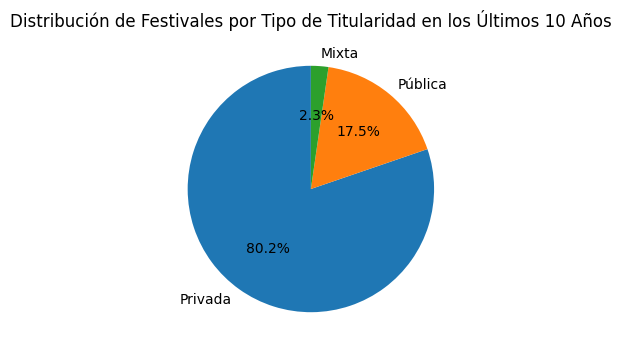

In [322]:
totales_titularidad = festivales_decada['Titularidad'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(totales_titularidad, labels=totales_titularidad.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Festivales por Tipo de Titularidad en los Últimos 10 Años')
plt.show()

Además, y como se puede ver en el notebook de análisis bivariantes, año tras año se refleja esta una diferencia entre los ámbitos de los festivales de titularidad pública y privada. <br>
El siguiente gráfico muestra dicho reparto y su evolución a través de los 10 años analizados: <br>

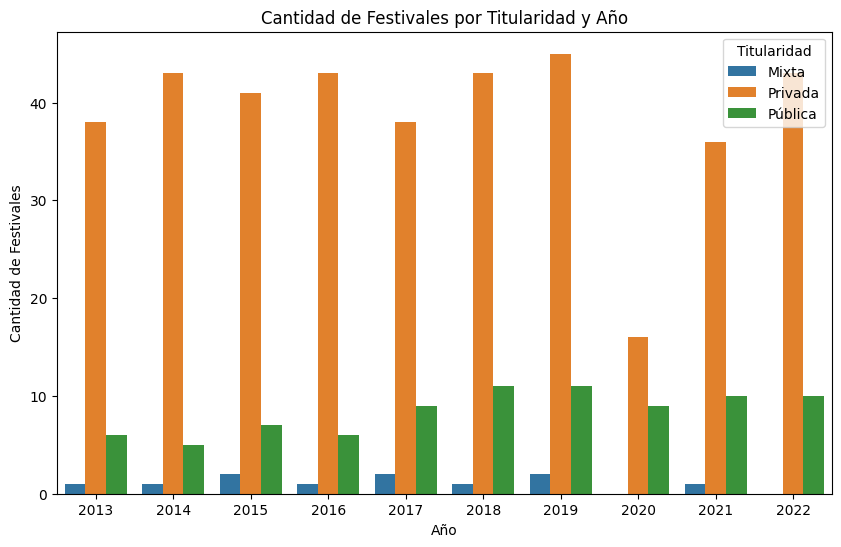

In [323]:
resumen_anual = pd.crosstab(festivales_decada['Any'], festivales_decada['Titularidad'])
plt.figure(figsize=(10, 6))

sns.barplot(data=resumen_anual.reset_index().melt(id_vars='Any', var_name='Titularidad', value_name='Cantidad'),
            x='Any', y='Cantidad', hue='Titularidad')

plt.title('Cantidad de Festivales por Titularidad y Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Festivales')
plt.legend(title='Titularidad')

plt.show()

Más interesante aún es cuando comparamos la totalidad de festivales de la década agrupados por ámbito y diferenciados por titularidad:

In [324]:
tabla_contingencia = pd.crosstab(festivales_decada['Ambit'], festivales_decada['Titularidad'])
tabla_contingencia

Titularidad,Mixta,Privada,Pública
Ambit,,,
Arts escèniques,0,19,24
Arts visuals,0,42,7
Audiovisuals,7,118,0
Lletres,4,9,19
Multidisciplinaris i altres,0,39,17
Música,0,159,17


Esta tabla de contingencia refleja cómo los sectores que más interesan al sector privado son los audiovisuales, la música y las artes visuales. En contraste, los festivales públicos destacan justamente en 2 sectores donde la injerencia privada es mucho menos: las escénicas y las letras.<br>

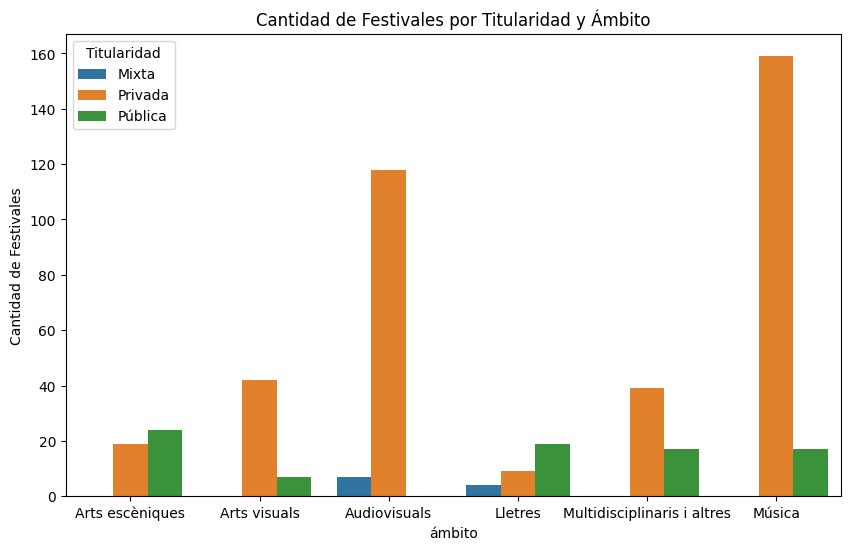

In [325]:
resumen_anual_por_ambito = pd.crosstab(festivales_decada['Ambit'], festivales_decada['Titularidad'])
plt.figure(figsize=(10, 6))

sns.barplot(data=resumen_anual_por_ambito.reset_index().melt(id_vars='Ambit', var_name='Titularidad', value_name='Cantidad'),
            x='Ambit', y='Cantidad', hue='Titularidad')

plt.title('Cantidad de Festivales por Titularidad y Ámbito')
plt.xlabel('ámbito')
plt.ylabel('Cantidad de Festivales')
plt.legend(title='Titularidad')

plt.show()

Al ver así la comparativa, en valores absolutos, lo que destaca más bien es que la iniciativa pública, si bien es mñas fuerte en ciertos ámbitos, es relativamente estable en la mayoría de los ámbitos, a excepción de audiovisuales. Y lo que el gráfico nos indica es que hay sectores concretos donde lo que sale de los parámetros en la propia iniciativa privada.

Para contextualizar dicha situación en un marco de políticas culturales, y entender por qué ciertos sectores resultan más o menos interesantes a la iniciativa privada, veremos dos elementos claves que hacen a la rentabilidad de los modelos económicos de los festivales, como son la cantidad de asistentes y el modelo gratuito o de pago:

Primero calculamos la cantidad de asistentes totales por ámbito:

In [326]:
total_asistentes = festivales_decada.groupby('Ambit')['Asistentes'].sum()
total_asistentes.sort_values(ascending = False)

Ambit
Música                         7632453.0
Arts escèniques                3340090.0
Multidisciplinaris i altres    1901330.0
Arts visuals                   1750964.0
Audiovisuals                   1582171.0
Lletres                         332631.0
Name: Asistentes, dtype: float64

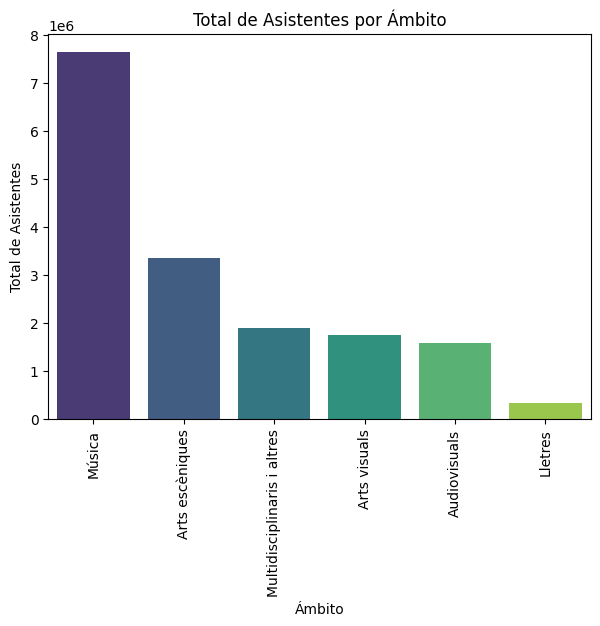

In [327]:
total_asistentes = festivales_decada.groupby('Ambit')['Asistentes'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(7, 5))  
sns.barplot(x='Ambit', y='Asistentes', hue='Ambit', data=total_asistentes, palette='viridis', legend=False)  
plt.title('Total de Asistentes por Ámbito')
plt.xlabel('Ámbito')
plt.ylabel('Total de Asistentes')
plt.xticks(rotation=90) 
plt.show()

Aquí podemos ver cómo el ámbito más popular es el de la música, con más de 7 millones y medio, seguido por escénicas, con cifras por debajo de los 3 millones y medio. Y que las letras quedan relegadas al último lugar.

Ahora veamos qué porcentaje de festivales de pago hay en cada ámbito:

In [328]:
festivales_decada['Es_lucrativo'] = (festivales_decada['Entrada'] == 'De Pago').astype(int)

In [329]:
total_festivales_por_ambito = festivales_decada.groupby('Ambit')['Es_lucrativo'].count()
festivales_pago_por_ambito = festivales_decada.groupby('Ambit')['Es_lucrativo'].sum()

In [330]:
porcentaje_pago = (festivales_pago_por_ambito / total_festivales_por_ambito * 100).round(2)

In [331]:
tabla_ambitos_lucrativos = pd.DataFrame({
    'Total Festivales': total_festivales_por_ambito,
    '% Festivales Entrada de Pago': porcentaje_pago
})

print(tabla_ambitos_lucrativos)

                             Total Festivales  % Festivales Entrada de Pago
Ambit                                                                      
Arts escèniques                            43                         53.49
Arts visuals                               49                         61.22
Audiovisuals                              125                         87.20
Lletres                                    32                         28.12
Multidisciplinaris i altres                56                         50.00
Música                                    176                         85.23


In [332]:
tabla_ambitos_lucrativos.sort_values('% Festivales Entrada de Pago', ascending=False)

,Total Festivales,% Festivales Entrada de Pago
Ambit,,
Audiovisuals,125,87.20
Música,176,85.23
Arts visuals,49,61.22
Arts escèniques,43,53.49
Multidisciplinaris i altres,56,50.00
Lletres,32,28.12


A partir de los datos que tenemos hasta ahora podemos ver que:<br> 
* El ámbito estrella del sector privado es la música, que a su vez es el que más asistentes ha recibido en toda la década (y en casi cada año individualmente también, como se ve en el notebookde análisis multivariantes), y que es un sector donde el modelo habitual es mediante pago de entrada. Aquí, la iniciativa pública es muy secundaria. <br>
* El ámbito audiovisual, si bien recibe menos asistentes que la música, es aún más lucrativo, con un 87% de festivales de pago. En este ámbito las iniciativas públicas son directamente nulas.<br>
* Contrasta con el ámbito de las escénicas, que si bien recibe una gran afluencia de público, solo es de pago en el 53% de los casos. Esto explicaría que sea la administración pública la que más impulsa esta tipo de festival, aparentemente menos lucrativa que las anteriores. 
* Y ni qué decir de las letras, que además de recibir menos visitantes, casi siempre es en formato gratuito, lo que invitaría a deducir que no representa la mejor oportunidad de negocio para el sector privado.

### Conclusión hipótesis I:
De los datos observados podemos concluir que efectivamente hay una división de ámbitos entre el sector público y el privado, donde el sector público apuesta a llegar a la mayor cantidad de público en modelos que generen ingresos, mientras que la administración pública se encarga de sectores o bien minoritarios, como las letras, o bien populares pero de menor rentabilidad, como las artes escénicas.<br>
Esto podría responder a políticas culturales pública de inclusión y diversidad, donde la administración pública busca impulsar y llenar los vacíos que es difícil sostener con modelos de negocio privados.

#### Bonus H1

Como bonus de este apartado sobre la comparación entre la programación de festivales públicos y privados, resulta interesante analizar la evolución de ambos con el correr de los años: <br>
Por lo general, la proporción es de 85% de iniciativa privada frente a un 15% público. Sin embargo, en el 2020, año de la pandemia, la proporción cambió drásticamente, y los festivales públicos alcanzan la cuota del 40%... pero no por impulsar más festivales sino por mantenerse en pie casi en su totalidad frente la drástica caída de los festivles de iniciativa privada.

<Figure size 1600x1800 with 0 Axes>

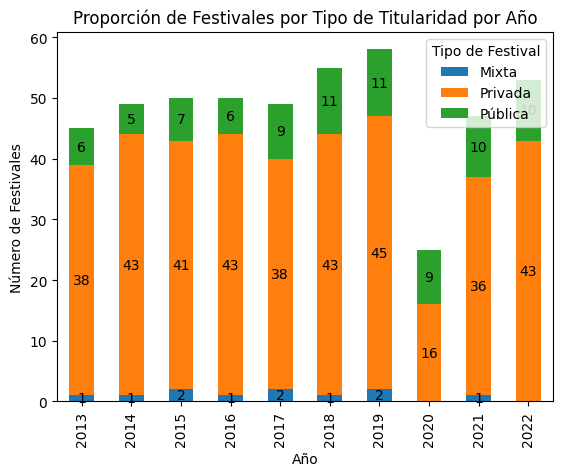

In [333]:
resumen_anual_publico_privado = pd.crosstab(festivales_decada['Any'], festivales_decada['Titularidad'])

plt.figure(figsize=(16, 18)) 

ax = resumen_anual_publico_privado.plot(kind='bar', stacked=True)
plt.title('Proporción de Festivales por Tipo de Titularidad por Año')
plt.xlabel('Año')
plt.ylabel('Número de Festivales')
plt.legend(title='Tipo de Festival')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  
        ax.text(x + width/2, 
                y + height/2, 
                str(int(height)),         
                horizontalalignment='center', 
                verticalalignment='center')

plt.show()

### Hipótesis II: La mayoría de los festivales se concentra justo antes y después de los meses de calor y playa

Antes de iniciar el análisis de datos correspondiente a verifiar o refutar esta hipótesis cabe hacer que considero "meses de calor y playa" a julio y agosto, que coinciden no solo con los picos de temperaturas más altas sino también con los períodos de vacaciones del sector educativo.

In [334]:
meses_festivaleros = festivales_decada['Mes'].value_counts()
meses_festivaleros

Mes
Junio         75
Noviembre     68
Octubre       58
Julio         53
Septiembre    43
Enero         43
Mayo          42
Marzo         34
Abril         21
Febrero       19
Agosto        13
Diciembre     12
Name: count, dtype: int64

C:\Users\marce\AppData\Local\Temp\ipykernel_32428\2680886436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mes', y='Cantidad', data=meses_festivaleros, palette='viridis')


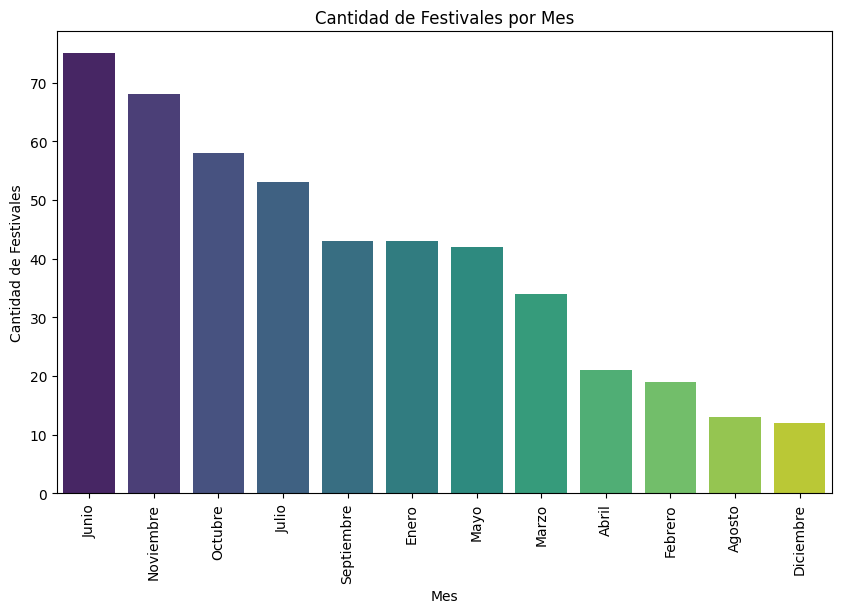

In [335]:
meses_festivaleros = festivales_decada['Mes'].value_counts().reset_index()
meses_festivaleros.columns = ['Mes', 'Cantidad'] 
plt.figure(figsize=(10, 6))
sns.barplot(x='Mes', y='Cantidad', data=meses_festivaleros, palette='viridis')
plt.title('Cantidad de Festivales por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Festivales')
plt.xticks(rotation=90) 
plt.show()

En los diferentes análisis de la distribución de festivales por meses, año por año, ya se veía que junio era uno de los meses más populares en casi todos los casos, si bien a veces era superado por octubre y/o noviembre. <br>
En este gráfico agrupado se confirma dicha información para el total de la década

C:\Users\marce\AppData\Local\Temp\ipykernel_32428\2406271597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estacion', y='Cantidad', data= estaciones_festivaleras, palette='viridis')


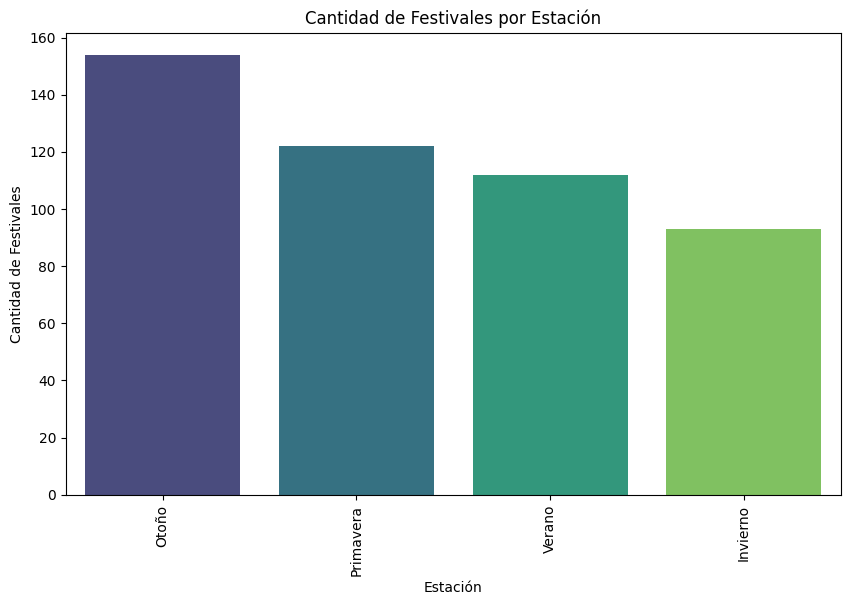

In [336]:
estaciones_festivaleras = festivales_decada['Estacion'].value_counts().reset_index()
estaciones_festivaleras.columns = ['Estacion', 'Cantidad'] 
plt.figure(figsize=(10, 6))
sns.barplot(x='Estacion', y='Cantidad', data= estaciones_festivaleras, palette='viridis')
plt.title('Cantidad de Festivales por Estación')
plt.xlabel('Estación')
plt.ylabel('Cantidad de Festivales')
plt.xticks(rotation=90) 
plt.show()

Pero me ha parecido interesante ir un poco más allá y calcular el volumen de festivales pre y post verano por estación completa. Visto así hay una ligera inversión respecto al gráfico por meses. Es decir, si al mirar meses concretos concluíamos que la mayor oferta estaba en junio, justo antes de la temporada de playa, al mirar por estación completa, donde se suman las propuestas del 2do y 3er més con más oferta de festivales, pasa a ser el otoño la temporada estrella para los amantes de los festivales en Barcelona.

### Conclusión hipótesis II:

En cualquier caso, se confirma la hipótesis de que en una ciudad turística costera no compitan dos de los principales reclamos, festival y playas, entre sí por el tiempo y la atención de las personas, sean locale so turistas. Sino que tiene sentido que ambas propuestas se turnen y así sean primavera y otoño las temporadas con picos de festivales.<br><br>
Otro punto interesante a mencionar en este apartado es que en Barcelona hay un buen número de fiestas mayores de barrios (incluyendo las de Gràcia, que son de las más populares de la ciudad) y que que movilizan buena parte de los conciertos y actividades artísticas en el espacio público, pero no califican como festivales, al menos para los parámetros con los que se han creado las tablas de datos a partir de las cuales se ha elaborado este EDA. Esto contrasta con las Fiestas de la Mercé, que es la fiesta mayor de la ciudad en conjunto, que tiene lugar en septiembre y sí califica como festival. De hecho, como festivales en plural, ya que incluye el BAM (Barcelona Acció Musical) y MAC (Mercé Arts de Carrer). Por sus fechas, suele caer en verano, ya que lo normal es que acabe el día de la Mercé, 24de septiembre, luego de una semana de festejos, y en este EDA he tomado la fecha de inicio como el indicador de la estación a la que pertenece el festival.<br>
Una aclaración similar tiene que ver con el festival Primavera Sound, que suele tener lugar entre finales de mayo y principios de junio, según el año. En este caso siempre cae en primavera, aunque a veces sume valores a junio, mes ya puntero, y en otros casos a mayo. Si bien no será el único caso que presenta este matiz en la fecha, sí es de los mñas relevantes por el volumen de asistentes que tiene edición tras edición.<br><br>
Sería interesante analizar, pero queda para otro estudio futuro, porqué el invierno, que no compite con la playa (y en el caso de Barcelona, tampoco mucho con la nieve) no ofrece una mayor cantidad de propuestas de festivales. Para ello sería necesario analizar la cantidad de asistentes en relación a los recintos disponibles, para ver en qué medida es viable hacer una propuesta importante de festivales en espacios cerrados para proteger de la intemperie. Pero esta cuestión no entra en el espectro cubierto por el presente EDA.


#### Bonus H2

Como punto extra vinculado a este asunto, me ha parecido interesante también hacer el desglose de qué tipo de festivales se programan en cada estación, por si ello dibujara una imagen diferente de la distribución de los festivales artísticos en la ciudad condal.

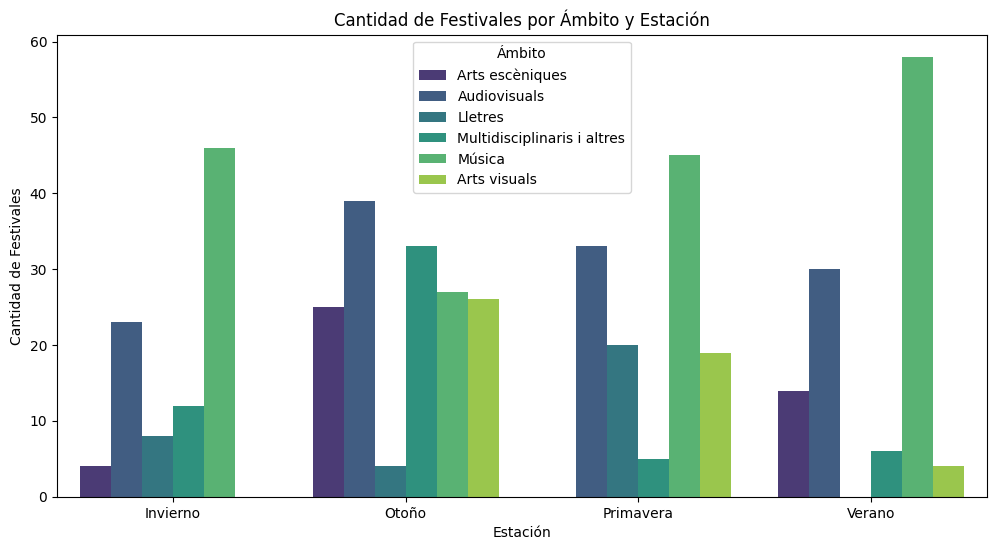

In [337]:
ambito_estacion_count = festivales_decada.groupby(['Estacion', 'Ambit']).size().reset_index(name='Cantidad')
plt.figure(figsize=(12, 6))
sns.barplot(x='Estacion', y='Cantidad', hue='Ambit', data=ambito_estacion_count, palette='viridis')
plt.title('Cantidad de Festivales por Ámbito y Estación')
plt.xlabel('Estación')
plt.ylabel('Cantidad de Festivales')
plt.legend(title='Ámbito')
plt.show()

Resulta al menos curioso ver que solo el otoño, que ya era la estación con mayor oferta festivalera, es la única estación que tiene festivales de todos los ámbitos, y que en las demás, si bien en todas predomina la música. hay un balane diferente, sin escénicas en primavera, sin letras en verano y sin visuales en invierno.

### Hipótesis III: Los festivales gratuitos son los que convocan mayor número de asistentes

Además de "Gratis" y "De pago" hay un tercer valor posible para esta categoría, "Mixta" que corresponde a aquellos casos en que el festival ofrece tanto programación con entrada de pago como alternativas gratuitas. Sin embargo, esta alternativa es muy minoritaria, como se ve en este primer gráfico, aunque no se puede descartar del todo por el peso específico que tienen en ciertos ámbitos, como el de artes escénicas.<br>
El siguiente gráfico nos da una buena radiografía de la distribución de asistentes en los festivales según estos sean de pago o de entrada gratuita.

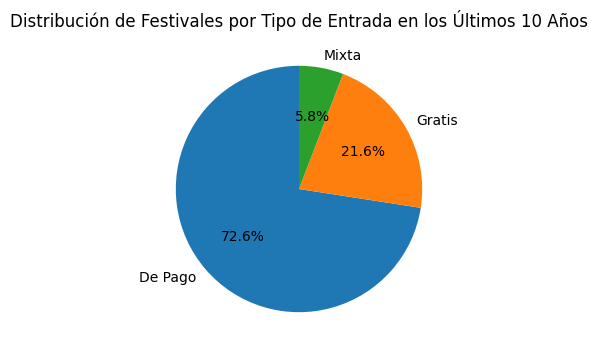

In [338]:
totales_entrada = festivales_decada['Entrada'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(totales_entrada, labels=totales_entrada.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Festivales por Tipo de Entrada en los Últimos 10 Años')
plt.show()

In [339]:
tabla_contingencia = pd.crosstab(festivales_decada['Ambit'], festivales_decada['Entrada'])
tabla_contingencia

Entrada,De Pago,Gratis,Mixta
Ambit,,,
Arts escèniques,23,10,10
Arts visuals,30,19,0
Audiovisuals,109,16,0
Lletres,9,19,4
Multidisciplinaris i altres,28,23,5
Música,150,17,9


En el siguiente gráfico vemos cómo se distribuye, en cada ámbito, el número de festivales según su tipolgía de entrada

<Figure size 1600x1800 with 0 Axes>

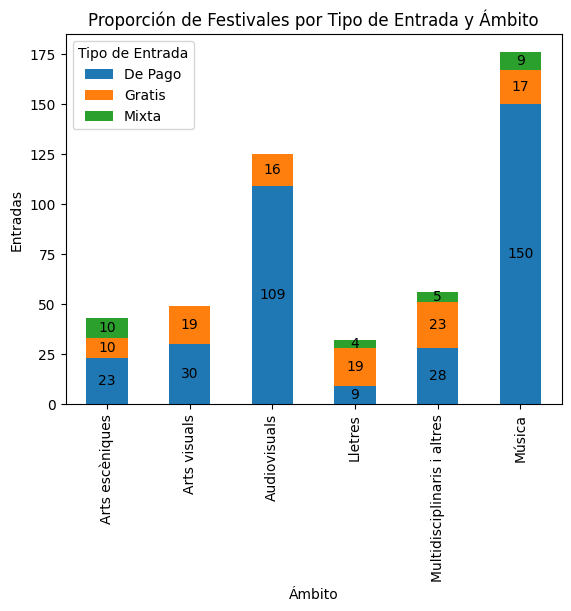

In [340]:
resumen_decada_tipo_entrada = pd.crosstab(festivales_decada['Ambit'], festivales_decada['Entrada'])

plt.figure(figsize=(16, 18)) 

ax = resumen_decada_tipo_entrada.plot(kind='bar', stacked=True)
plt.title('Proporción de Festivales por Tipo de Entrada y Ámbito')
plt.xlabel('Ámbito')
plt.ylabel('Entradas')
plt.legend(title='Tipo de Entrada')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  
        ax.text(x + width/2, 
                y + height/2, 
                str(int(height)),         
                horizontalalignment='center', 
                verticalalignment='center')

plt.show()

Lo visto hasta ahora nos podría llevar a pensar que tal vez haya más cantidad de festivales de pago, pero que no necesariamente tengan la misma aceptación del público solo por haber más oferta, y que los asistentes podrían decantarse mayormente por ir a eventos gratuitos.

Para verificar esta hipótesis, ahora miramos cómo ha sido, a lo largo de toda la década analizada, la relación entre cantidad de asistentes a los festivales y el tipo de entrada.<br> 
Para ello tomo la media de asistentes según tipo de entrada luego de haber calculado la media de asistentes a cada festival en concreto a lo largo de la década (así, por ejemplo, en lugar de 10 outliers correspondientes a 10 ediciones de un festival grande, solo vemos un outlier por festival, que representa el conjunto de sus ediciones a lo largo de la década).

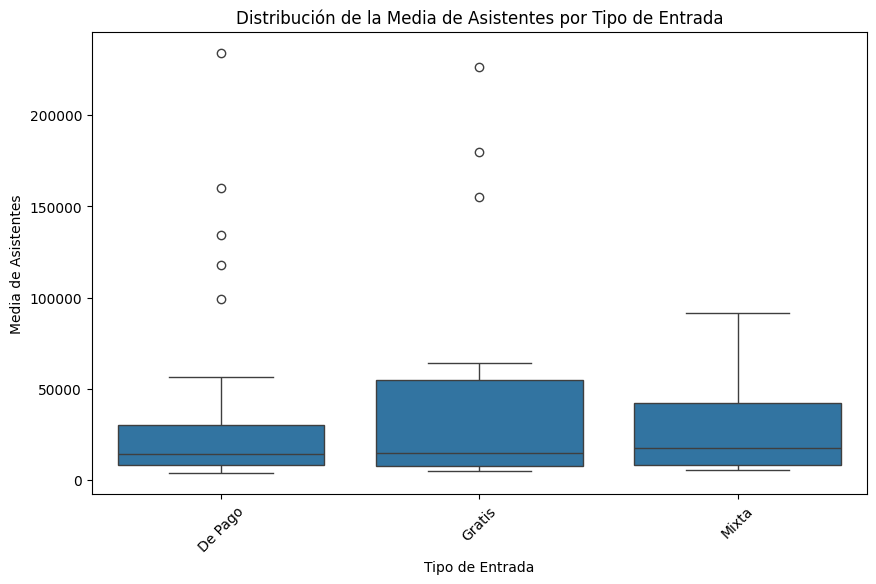

In [341]:
plot_media_asist_boxplots(df=festivales_decada)

Este boxplot nos muestra que la media de todos los festivales, es independiente del tipo de entrada y está en torno a los 12 mil asistentes. <br>
También nos enseña que la dispersión es mucho mayor en el caso de los festivales gratuitos que los de pago, casi el doble, de hecho, aunque el rango total de ambos llega hasta los 50 mil asistentes. Es decir, hasta aquí sí podríamos decir que aunque la media es similar, si que hay muchos más festivales gratis que convocan hasta unas 50 mil personas<br><br>
Pero es muy interesante prestar atención a los outliers de cada caso:<br>
Hay 3 festivales gratuitos que disparan las cifras de asistentes, con medias entre los 150 y 250 mil asistentes. Pero es que en el caso de los de entrada de pago, el valor máximo media es aún superior, sobre los 275 mil, además de otros 4 festivales con medias de asistentes de 100 a 160 mil asistentes.


Cabe preguntarse también si hay alguna relación entre el tipo de entrada vinculada al ámbito artístico, y que ello repercuta en más o menos asistentes. Para ello puede servir el siguiente gráfico de dispersión:

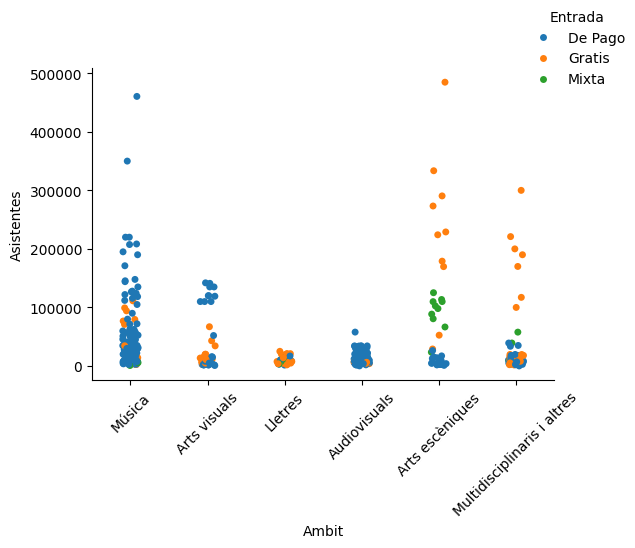

In [342]:
g = sns.catplot(x="Ambit", y="Asistentes", hue="Entrada", data=festivales_decada, kind="strip", height=5, aspect=1)  # Ajustamos 'height' y 'aspect' para cambiar la proporción del gráfico

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Ajustar la leyenda de forma manual si aún está en una posición problemática
g._legend.set_bbox_to_anchor((1.05, 1))  # Mueve la leyenda fuera del área de trazado

# Ajusta automáticamente los parámetros de subplots para dar espacio a las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Conclusión Hipótesis III

Como conclusión, la hipótesis de que los festivales gratuitos convocan más asistentes que los de pago queda desmentida ya que esto solo se cumple de forma relativa en los formatos medianos de menos de 50 mil asistentes, pero cuando se grata de mega eventos, ambas opciones están bastante equilibradas, y la cifra más alta de media corresponde, de hecho, a un festival de pago.

#### Bonus H3

##### BONUS A: crecimiento sostenido de la media hasta el 18 <br>

Al hacer la primera parte del análisis exploratorio me llamó la atención cómo había evolucionado en general la media de asistentes a festivales a lo largo de la década, ya que durante los primeros 5 años el crecimiento fue muy ligero, y a partir del 2018 y hasta el 19 empieza a crecer a los satos. Sin embargo, esta tendencia se ve truncada con la pandemia, aunque la impresiós es de ráida recuperación: ya solo en 2022 se vuelve a cifras superiores. 

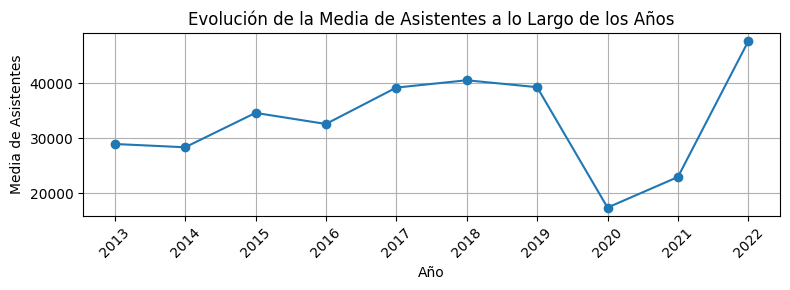

In [343]:
media_asistentes_anuales = festivales_decada.groupby('Any')['Asistentes'].mean().reset_index()

# Creando el gráfico de líneas
plt.figure(figsize=(8, 3))
plt.plot(media_asistentes_anuales['Any'], media_asistentes_anuales['Asistentes'], marker='o')  # Usamos 'marker' para marcar cada punto de datos
plt.title('Evolución de la Media de Asistentes a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Media de Asistentes')
plt.grid(True)  # Añade una cuadrícula para mejor visualización
plt.xticks(media_asistentes_anuales['Any'], rotation=45)  # Asegura que todos los años sean mostrados y rotados para mejor lectura
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot para que encaje bien en el área de trazado

# Mostrar el gráfico
plt.show()

Podría ser interesante tirar de este hilo para entender a qué se debe dicho cambio, por ejemoplo, qué relación puede tener con la cantidad de turismo que recibe la ciudad

##### BONUS B: dispersión y saltos entre media y máxima

Relacionado al punto anterior, también me ha resultado llamativa la dispersión entre la mediana de asistentes a los festivales Barceloneses y los valores máximos, que ponen de manifiesto algunos picos que podría sería interesante investigar, aunque no entra en el alcance de este EDA.

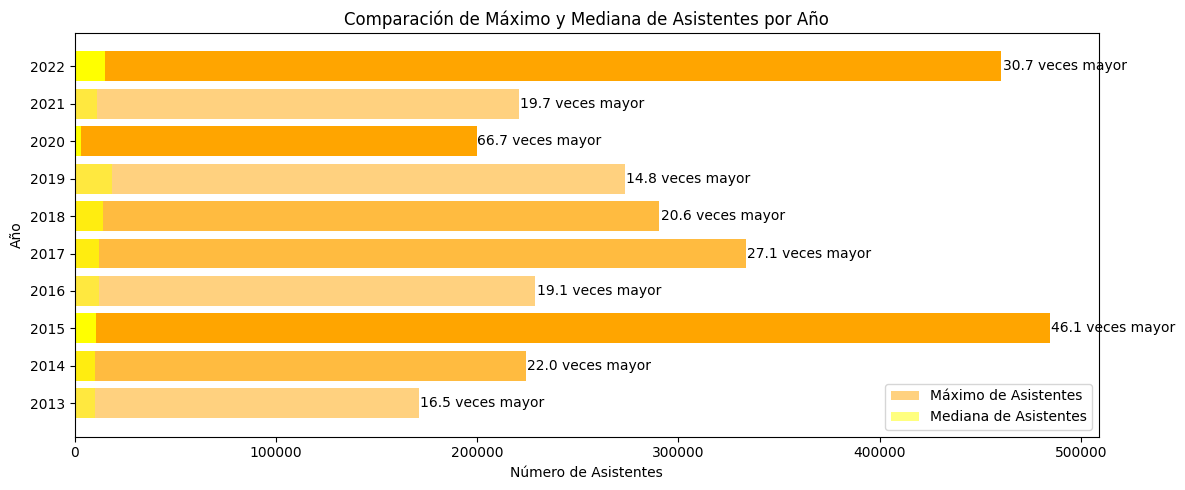

In [354]:
asistentes_max_vs_mediana = festivales_decada.groupby('Any')['Asistentes'].agg(['median', 'max'])
asistentes_max_vs_mediana['ratio'] = asistentes_max_vs_mediana['max'] / asistentes_max_vs_mediana['median']

plt.figure(figsize=(12,5))
for index, row in asistentes_max_vs_mediana.iterrows():
    if row['ratio'] > 30:
        color_max = 'orange'
        color_med = 'yellow'
        alpha = 1.0  # sin transparencia
    elif row['ratio'] < 20:
        color_max = 'orange'
        color_med = 'yellow'
        alpha = 0.5  # más transparencia
    else:
        color_max = 'orange'
        color_med = 'yellow'
        alpha = 0.75  # transparencia intermedia
    
    plt.barh(index, row['max'], color=color_max, alpha=alpha)
    plt.barh(index, row['median'], color=color_med, alpha=alpha)
    plt.text(row['max'] + 0.05 * row['median'], index, f'{row["ratio"]:.1f} veces mayor', va='center')

plt.xlabel('Número de Asistentes')
plt.ylabel('Año')
plt.title('Comparación de Máximo y Mediana de Asistentes por Año')
plt.yticks(asistentes_max_vs_mediana.index)  # Asegúrate de que los yticks usen el índice del DataFrame

# Crear una leyenda
plt.legend(['Máximo de Asistentes', 'Mediana de Asistentes'], loc='best')

# Ajustar layout para que no se corten las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Hipótesis IV: En Barcelona ha crecido la tendencia a programar macrofestivales

Para empezar a trabajar esta hipótesis, primero definiré qué entiendo por "macrofestival" en el conexto de este análisis. Y para ello me voy a apoyar, como no puede ser de otra manera, en los datos. En este caso, será el IQR, índice intercuartílico, sumado al gráfico de boxplot anterior, el que sirva como medida para clasificar los festivales.

In [ ]:
print("Un festival pequeño tiene hasta", round(festivales_decada["Asistentes"].quantile(0.25),-2), "asistentes", "\n",
      "Un festival mediano tiene hasta", round(festivales_decada["Asistentes"].quantile(0.5),-2), "asistentes", "\n",
    "Un festival grande tiene hasta", round(festivales_decada["Asistentes"].quantile(0.85),-2), "asistentes", "\n",  
    "Un macro festival tiene mas de", round(festivales_decada["Asistentes"].quantile(0.85),-2), "asistentes")

Un festival pequeño tiene hasta 6400.0 asistentes 
 Un festival mediano tiene hasta 12700.0 asistentes 
 Un festival grande tiene hasta 57800.0 asistentes 
 Un macro festival tiene mas de 57800.0 asistentes


Como es de prever, los macrofestivales coincidirán con los outliers, los grandes serán aquellos entre la media y el límite del rango IQR, los pequeños los que estñan por debajo de ese 25%, y medianos los demás.

Ahora voy a tomar esos datos para clasificar todos los fetsivales según su tamaño y valorar dos cuestiones:<br>
* Por un lado, quiero ver si los fetsivales de cada categoría tienen algún denominador común en lo que a ámbitos de las artes se refiere.
+ Por otro, quiero descubrir si con el paso de los años estos diferentes tipos de fetsivales han crecido o disminuido en cantidad.

In [ ]:
q25 = round(festivales_decada["Asistentes"].quantile(0.25), -2)
q50 = round(festivales_decada["Asistentes"].quantile(0.50), -2)
q85 = round(festivales_decada["Asistentes"].quantile(0.85), -2)

def clasificar_festival(asistentes):
    if asistentes <= q25:
        return 'Pequeño'
    elif asistentes <= q50:
        return 'Mediano'
    elif asistentes <= q85:
        return 'Grande'
    else:
        return 'Macro'

¿Cuántos festivales hay en Barcelona de cada tipo?

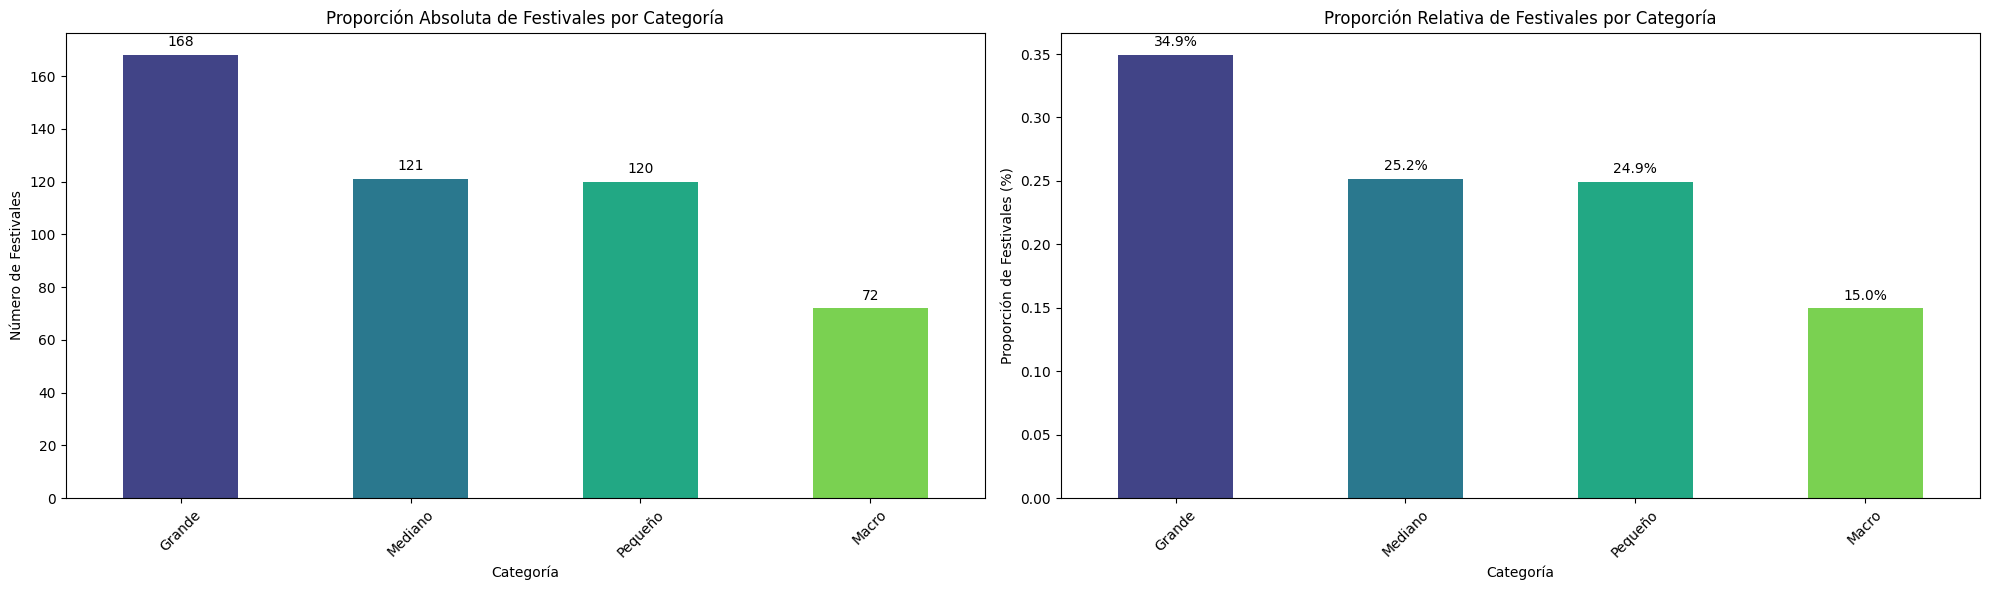

In [ ]:
festivales_decada['Categoria'] = festivales_decada['Asistentes'].apply(clasificar_festival)
frecuencia_absoluta = festivales_decada['Categoria'].value_counts()
frecuencia_relativa = festivales_decada['Categoria'].value_counts(normalize=True)

colores = sns.color_palette('viridis', n_colors=len(frecuencia_absoluta))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6)) 

frecuencia_absoluta.plot(kind='bar', color=colores, ax=ax1)
ax1.set_title('Proporción Absoluta de Festivales por Categoría')
ax1.set_xlabel('Categoría')
ax1.set_ylabel('Número de Festivales')
ax1.set_xticklabels(frecuencia_absoluta.index, rotation=45)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

frecuencia_relativa.plot(kind='bar', color=colores, ax=ax2)
ax2.set_title('Proporción Relativa de Festivales por Categoría')
ax2.set_xlabel('Categoría')
ax2.set_ylabel('Proporción de Festivales (%)')
ax2.set_xticklabels(frecuencia_relativa.index, rotation=45)
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.1%'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

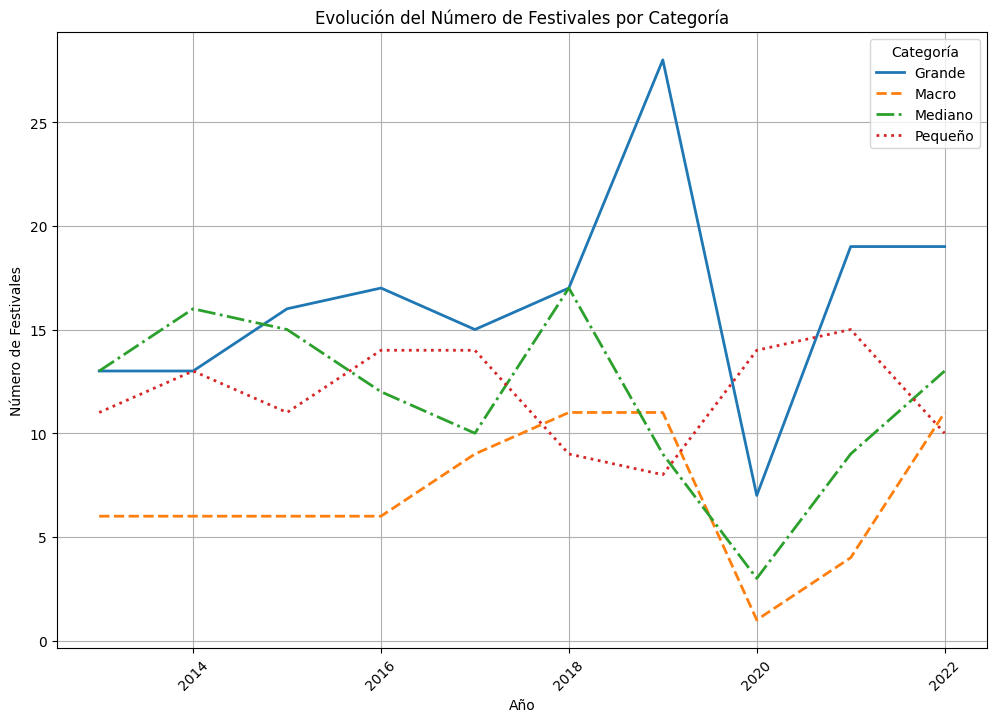

In [ ]:

media_asistentes = festivales_decada.groupby(['NomDelFestival', 'Any'])['Asistentes'].mean().reset_index()
media_asistentes['Categoria'] = media_asistentes['Asistentes'].apply(clasificar_festival)
evolución_categorías = media_asistentes.groupby(['Any', 'Categoria']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
line_styles = ['solid', 'dashed', 'dashdot', 'dotted']
for i, category in enumerate (evolución_categorías.columns):
    sns.lineplot(data=evolución_categorías, x=evolución_categorías.index, y=category, label=category, 
                 linestyle=line_styles[i % len(line_styles)], linewidth = 2)

plt.title('Evolución del Número de Festivales por Categoría')
plt.xlabel('Año')
plt.ylabel('Número de Festivales')
plt.legend(title='Categoría')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Conclusión Hipótesis IV

Este gráfico ya responde a mi cuarta hipótesis y la confirma parcialmente: <br>
En los últimos 10 años el número de macrofestivales casi se ha duplicado. De hecho, este crecimiento se ha concentrado entre 2016 y 2022. Y si bien fueron los que más cayeron,por cuestiones obvias, durante la pandemia, rápidamente se han vuelto a recuperar. Eso sí, no han pasado de los niveles de 2018 que es cuando alcanzaron y se estabilizaron en el pico máximo.<br>
Curiosamente, los festivales pequeños, que en 2019, año previo a la pandemia, estaban en su punto más bajo, crecieron entonces de forma repentina e incluso siguienton creciendo en 2021 aunque luego bajaran. Es el formato más estable en los últimos 10 años.<br>
Los festivales medianos, por su parte, no han conseguido recuperar sus cifras de prepandemia, mientras que los grandes, con la excepción de un pico inusualmente alto en 2019 y posterior caída en picado con la pandemia, sí que muestran un crecimiento sostenido, con cifras máximas al final de la dñecada analizada.

Bonus H4:

Como bonus de este apartado, veamos ahora si hay elementos en común en cada categoría, o si cada una tiene diversidad de ámbitos:

<Figure size 1200x800 with 0 Axes>

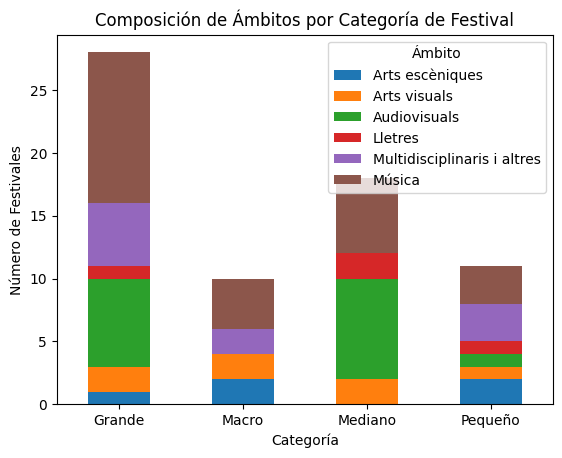

In [ ]:
media_asistentes_decada = festivales_decada.groupby('NomDelFestival')['Asistentes'].mean().reset_index()
media_asistentes_decada.columns = ['NomDelFestival', 'Asistentes']

media_asistentes_decada['Categoria'] = media_asistentes_decada['Asistentes'].apply(clasificar_festival)
festivales_con_ambito = festivales_decada[['NomDelFestival', 'Ambit']].drop_duplicates()
media_asistentes_con_ambito = pd.merge(media_asistentes_decada, festivales_con_ambito, on='NomDelFestival')
composicion_ambitos = media_asistentes_con_ambito.groupby(['Categoria', 'Ambit']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
composicion_ambitos.plot(kind='bar', stacked=True)
plt.title('Composición de Ámbitos por Categoría de Festival')
plt.xlabel('Categoría')
plt.ylabel('Número de Festivales')
plt.legend(title='Ámbito')
plt.xticks(rotation=0)
plt.show()

Algunas observaciones que podemos sacar de este gráfico:
* el segmento de macrofestivales está repartido de forma relativamente equitativa entre 4 ámbitos: música, artes multidisiplinares, visuales  y escénicas;
* el segmento de grandes festivales sin duda alguna está dominado por la música, seguida de audiovisuales;
* los festivales de tamaño medio son sobre todo audiovisuales, aunque hay mucha música también. Curiosamente, no hay festivales ni de artes escénicas ni multidisciplinares de tamaño mediano;
* los pequeños festivales tienen todo tipo de programación, es donde hay mayor equilibrio de ámbito de propuesta

### Reflexión final: ¿Qué cambió con la pandemia?

Sin intención de hacer un análisis exhaustivo de las consecuencias de la pandemia en los fetsivales culturales de Barcelona, cuestión que escede este estudio, si creo oportuno apuntar un par de reflexiones vinculadas a este tema que se han ido desprendiendo del análisis exploratorio realizado.

Por un lado, veamos otra evolución a lo largo de esta década, que es la del número de asistentes por ámbito de las artes. ¿Qué sectores habrán crecido más o menos?

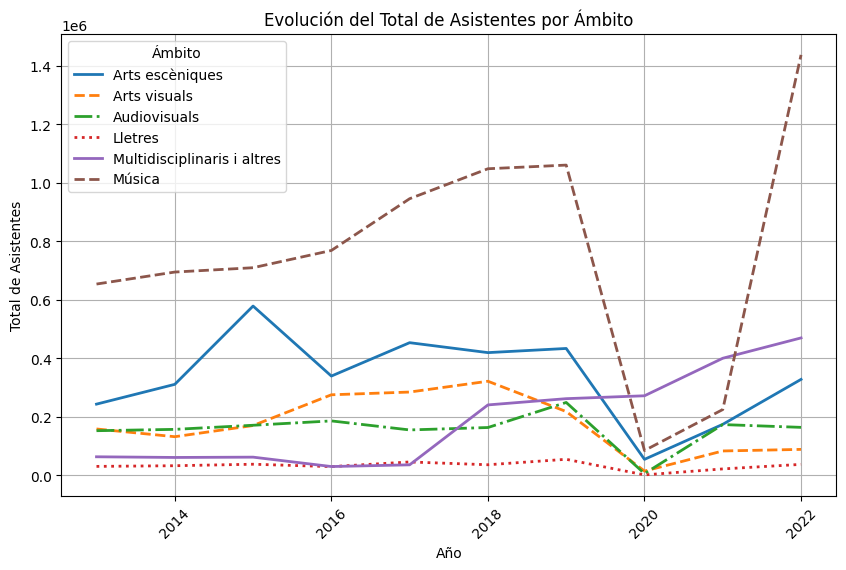

In [ ]:
evolución_asistentes_ambito = festivales_decada.groupby(['Any', 'Ambit'])['Asistentes'].sum().unstack(fill_value=0)

plt.figure(figsize=(10, 6))

line_styles = ['solid', 'dashed', 'dashdot', 'dotted']

for i, ambit in enumerate(evolución_asistentes_ambito.columns):
    sns.lineplot(data=evolución_asistentes_ambito, x=evolución_asistentes_ambito.index, y=ambit, label=ambit, 
                 linestyle=line_styles[i % len(line_styles)], linewidth=2)

plt.title('Evolución del Total de Asistentes por Ámbito')
plt.xlabel('Año')
plt.ylabel('Total de Asistentes')
plt.legend(title='Ámbito')
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()

No sorprende ver que es la música el ámbito que más crece en numero de asistentes, y que en parte refleja la curva de crecimiento de los macrofetsivales. Sin embargo, sigue siendo llamativo su alto repunte y las cifras record al cierre del período de análisis.<br>
Otra cuestoón llamativa es cómo en plena pandemia el único público que no solo ha resistido sino que incluso ha crecido es el de los festivales multidisciplinares.<br>
Y con signo contrario, se ve que el público de las artes vosuales no se ha recuperado de la caída del 2020